# The Effect of President Trump’s Tweets on his Approval Rating

# Overview

Given the current pandemic, this project takes a closer look at the relationship between the POTUS’ tweet sentiments and his approval ratings. The project pulls from two databases, Trump Twitter Archive (dotcom) and fivethirtyeight (dotcom) polls. It takes data between January 2nd, 2020 and May 4th, 2020 from the early stages of the pandemic to today. The conclusions found were that (1) overall tweet sentiment per week tended to vary and (2) there was no strong evidence to demonstrate the relationship between tweet sentiment and approval rating as the approval rating could still be high during weeks with many neutral or negative tweets. Further analysis of this question requires a deeper look at other attributes.

# Names

- William Chung
- Meghan Yiu
- Kieu Huynh
- Sahil Umrotkar

# Research Question

How does the sentiment of certain words used by the US President on Twitter regarding the Coronavirus pandemic affect his approval rating?

## Background and Prior Work

Why is this question of interest to the group? What background information led to the hypothesis?

With recent world events regarding the Coronavirus, we thought it would be interesting to examine how the sentiment of the President affects the response from the American public. It was already clear to us from the President’s previous tweets that any contradictory or controversial statements led to a negative response from the public, oftentimes leading to increased anxiety and anger towards governments at the local and national level. 

Why is this important?

The President of the United States (POTUS) holds a lot of power in what he can do in terms of policy as well as his impact on domestic and international public perceptions. The US is a major sponsor for health organizations like the Center for Disease Control and Prevention (CDC) and the World Health Organization (WHO), who are both responsible for educating the public on diseases as well as prevention methods. By undermining these two organizations or not complying with health officials on guidelines [8], he sets the tone for public defiance, animosity, and fear. 
Twitter is one of Trump’s main platforms of communication with the American public, evident by his frequent daily posts on the site [1]. We can see that a lot of people are actively engaging and listening to him as well. Through increases of these protests, we are witnessing an increase of people refusing to comply with health guidelines, opening Americans up to a possible second wave of the virus as well as further economic setbacks [8]. Since the election is coming up soon, analyzing the effect of the President’s Twitter activity towards the public's response can be important. This can help to predict what may happen during the election.

What has already been done on this topic? What is already known?

There is a pre-existing archive of all the tweets that the US President has posted, the Trump Twitter Archive [1]. The tweets can be organized by date, certain words, favorite count and retweet count. It is known that the President is very active on Twitter engaging with both Americans and non-Americans, so this is an extensive database. Furthermore, in order to analyze the sentiment of his use of words, there are tools that can help to determine the negativity, positivity, or neutrality of certain words [2]. 
There are extensive polls done by different news outlets and university researchers on the approval rating and trust towards the President’s response to the coronavirus pandemic, and it is known that the ratings are starting to drop [4,9]. Certain tweets of the POTUS have also affected public response in very specific ways, as seen by the protests against stay-at-home orders [6,8].

References:
- 1) http://www.trumptwitterarchive.com/
- 2) https://github.com/aesuli/sentiwordnet
- 3) https://thehill.com/homenews/administration/493701-trump-support-for-protests-threatens-to-undermine-social-distancing
- 4) https://www.nytimes.com/2020/04/10/us/politics/trump-polls-coronavirus.html
- 5) https://www.nytimes.com/2020/04/09/us/politics/coronavirus-trump-public-sentiment.html
- 6) https://www.bbc.com/news/world-us-canada-52330531
- 7) https://www.nytimes.com/interactive/2019/11/02/us/politics/trump-twitter-presidency.html
- 8) https://www.washingtonpost.com/politics/2020/04/17/liberate-trump-tweets-support-protesting-against-stay-at-home-orders/
- 9) https://projects.fivethirtyeight.com/trump-approval-ratings/
- 10) https://www.pewresearch.org/fact-tank/2019/07/15/about-one-in-five-adult-twitter-users-in-the-u-s-follow-trump/

# Hypothesis

In our study, we are aiming to find the correlation between sentiment analysis of the President’s Tweets and his approval ratings. We will be matching these two sets of data by week. We hypothesize that the sentiment in the majority of the President’s tweets will be positive, as he is biased towards his own response towards the coronavirus pandemic. Since we hypothesize that the President has a biased attitude towards his own response to the pandemic, a more positive sentiment will have a negative effect on public approval ratings. This could be due to increasing fear that he is downplaying the severity of the pandemic.   
When the President provides a more objective analysis with words that have neutral connotations, such as encouraging stay-at-home orders, there may be an increase in nationwide approval ratings and a more positive attitude towards the government.

# Datasets

- Dataset Name: Twitter
- Link to the dataset: http://www.trumptwitterarchive.com/
- Number of observations: ~1000

We will be analyzing tweets related to Covid-19 made by the President since the start of the year (1/1/2020). The tweets will be filtered through the use of keywords like Covid-19, coronavirus, pandemic, etc. There are existing tools like the Tweepy API or the Trump Twitter Archive that will allow us to scrape this data off of Twitter. We can then use tools like the SentiWordNet API in order to analyze the objectivity and sentiment of these tweets.


- Dataset Name: fivethirtyeight
- Link to the dataset: https://projects.fivethirtyeight.com/trump-approval-ratings/
- Number of observations: One per week, starting from 1/1/2020 → current.

We will be collecting Trump’s approval ratings on a weekly basis starting from 1/1/20 to present date. By doing so, we will analyse whether there is a correlation between the sentiment of the President’s Tweets during each week and his approval rating for that week.
Each poll from YouGov was taken from a random sample of 1,000 American adults of varying nationality, political affiliation, and age.
Average weekly approval rating since 1/1/2020 → 43%
Average weekly disapproval rating since 1/1/2020 → 51%

Interesting notes: Trump hit his career HIGHEST approval rating of 49% on 01/29/2020, 02/16/2020, and 03/22/2020, during the rise of the Coronavirus pandemic.

Combining Datasets: We’ll be comparing the sentiments of tweets and their relation to the President’s approval ratings on a weekly basis.

# Setup

In [1]:
# Importing Libraries

%matplotlib inline
import pandas as pd
import numpy as np
import re 
from textblob import TextBlob
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from datetime import date, time, datetime, timedelta

In [2]:
# Import the dataset

df = pd.read_csv('trump_tweets.csv')
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @JesseBWatters: What would the media say if...,05-05-2020 12:22:18,7433,0,True,1257646802716803073
1,Twitter for iPhone,Mexico is sadly experiencing very big CoronaVi...,05-04-2020 13:42:13,55724,260450,False,1257304527843110914
2,Twitter for iPhone,RT @Reuters: Roche gets FDA emergency use appr...,05-03-2020 20:22:31,5556,0,True,1257042876334321664
3,Twitter for iPhone,Intelligence has just reported to me that I wa...,05-03-2020 20:18:19,40834,164508,False,1257041819097092096
4,Twitter for iPhone,RT @Alyssafarah: The Trump Admin is making sur...,05-02-2020 21:25:45,5283,0,True,1256696404917059585
...,...,...,...,...,...,...,...
324,Twitter for iPhone,Working closely with China and others on Coron...,01-30-2020 22:04:35,22918,138150,False,1223004106408833025
325,Twitter for iPhone,Just received a briefing on the Coronavirus in...,01-30-2020 00:06:52,17266,74051,False,1222672488934584324
326,Twitter for iPhone,RT @OANN: Johnson &amp; Johnson to create coro...,01-28-2020 19:11:06,6008,0,True,1222235668430184449
327,Twitter for iPhone,RT @SenateForeign: Today I was briefed by lead...,01-28-2020 03:42:14,3941,0,True,1222001913081798656


# Data Cleaning

For our first dataset, the Trump Twitter Archive, we first imported the dataset as a .csv file using the pandas library. After importing the csv file as a text dataframe, we can see that there are multiple columns that are not valuable to our sentiment analysis, such as the source of the tweet, retweet count, the favorite count, whether the tweet was retweeted, and the id string.

In [3]:
# Clean the text 

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_text(df, 'text')

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,what would the media say if barack obama wer...,05-05-2020 12:22:18,7433,0,True,1257646802716803073
1,Twitter for iPhone,mexico is sadly experiencing very big coronavi...,05-04-2020 13:42:13,55724,260450,False,1257304527843110914
2,Twitter for iPhone,roche gets fda emergency use approval for co...,05-03-2020 20:22:31,5556,0,True,1257042876334321664
3,Twitter for iPhone,intelligence has just reported to me that i wa...,05-03-2020 20:18:19,40834,164508,False,1257041819097092096
4,Twitter for iPhone,the trump admin is making sure senior citize...,05-02-2020 21:25:45,5283,0,True,1256696404917059585
...,...,...,...,...,...,...,...
324,Twitter for iPhone,working closely with china and others on coron...,01-30-2020 22:04:35,22918,138150,False,1223004106408833025
325,Twitter for iPhone,just received a briefing on the coronavirus in...,01-30-2020 00:06:52,17266,74051,False,1222672488934584324
326,Twitter for iPhone,johnson amp johnson to create coronavirus va...,01-28-2020 19:11:06,6008,0,True,1222235668430184449
327,Twitter for iPhone,today i was briefed by leading global health...,01-28-2020 03:42:14,3941,0,True,1222001913081798656


To clean this dataset, we implemented df.drop, where we dropped the columns that did not add value to our sentiment analysis. In order to change the titles of the columns that are valuable, we used df.rename to change ‘text’ into ‘Tweet’, and ‘created_at’ into ‘Date Posted’. This makes it easier for readers to understand the data in the correct context. We also converted date posted into datetime objects, with the format year-month-day followed by time. This is because the date posted is the main information we will be using to analyze our two datasets (sentiment analysis and approval ratings) together. We can see that our dataset has only two columns: Tweet Body, Date Posted. This is a tidy, usable data format that we can later implement sentiment analysis on. Each variable is in a different row, and the important features are in columns.


In [4]:
# Drop extra columns

df = df.drop(['source', 'retweet_count', 'favorite_count', 'is_retweet', 'id_str'], axis=1)

In [5]:
# Change titles to more meaningful names

df = df.rename(columns={'text': 'Tweet Body', 'created_at': 'Date Posted'})

In [6]:
# Extract text to a list and convert date posted to datetime object

tweet_bodies = df['Tweet Body']
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df.head()

,Tweet Body,Date Posted
0,what would the media say if barack obama wer...,2020-05-05 12:22:18
1,mexico is sadly experiencing very big coronavi...,2020-05-04 13:42:13
2,roche gets fda emergency use approval for co...,2020-05-03 20:22:31
3,intelligence has just reported to me that i wa...,2020-05-03 20:18:19
4,the trump admin is making sure senior citize...,2020-05-02 21:25:45


In [7]:
# Analyse the sentiment of each Tweet

sentiments = []
for tweet_body in tweet_bodies:
    tweet_sentiment = TextBlob(tweet_body)
    if tweet_sentiment.sentiment.polarity > 0:
        sentiments.append("Positive")
    elif tweet_sentiment.sentiment.polarity == 0:
        sentiments.append("Neutral")
    elif tweet_sentiment.sentiment.polarity < 0:
        sentiments.append("Negative")
    

In [8]:
# Add sentiments to the dataframe

df['Sentiment'] = sentiments

In [9]:
# Sort the Tweets by their date posted

df = df.sort_values(by='Date Posted', ascending=True).reset_index(drop=True)
df.head(10)

,Tweet Body,Date Posted,Sentiment
0,china has been working very hard to contain th...,2020-01-24 21:18:15,Positive
1,today i was briefed by leading global health...,2020-01-28 03:42:14,Neutral
2,johnson amp johnson to create coronavirus va...,2020-01-28 19:11:06,Neutral
3,just received a briefing on the coronavirus in...,2020-01-30 00:06:52,Positive
4,working closely with china and others on coron...,2020-01-30 22:04:35,Positive
5,trump administration forms coronavirus task,2020-01-30 22:15:23,Neutral
6,working closely with china and others on cor...,2020-01-31 14:35:14,Positive
7,just had a long and very good conversation by ...,2020-02-07 10:31:22,Positive
8,the coronavirus is very much under control in ...,2020-02-24 21:42:02,Positive
9,cryin chuck schumer is complaining for publici...,2020-02-25 14:02:15,Positive


# Data Analysis & Results

The figure below shows the distribution of the sentiments of all the tweets used in our analysis. As we can see, the majority of Trump’s tweets have a positive sentiment as we hypothesized. Since he is biased towards his own response to the pandemic, it follows logically that most of his tweets would contain a positive sentiment, even if the overall public response is not as optimistic. Another reason for the volume of positive tweets may be to comfort the American public during the pandemic. With all that is happening, Trump would be ill-advised to focus on the negatives; rather, tweeting about the increases in testing, lower death rates, and overall improvement of the pandemic would be a better way to ease Americans during the crisis and increase his chances of re-election.

Text(0.5, 1.0, 'Number of Tweets vs. Sentiment of Tweets Made by the President Regarding COVID-19')

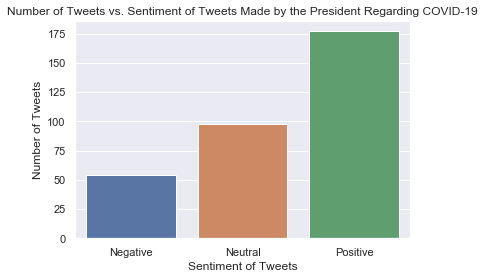

In [10]:
# Data Viz 1

sns.set(style="darkgrid")
sentiment_plot = sns.countplot(x="Sentiment", data=df, order=['Negative', 'Neutral', 'Positive'])
sentiment_plot.set_xlabel('Sentiment of Tweets')
sentiment_plot.set_ylabel('Number of Tweets')
sentiment_plot.set_title("Number of Tweets vs. Sentiment of Tweets Made by the President Regarding COVID-19")

For our second dataset, the FiveThirtyEight Approval Rating Project, much of the relevant data was already categorized into its own table.

Dates → In order to analyze the relationship between Trump’s tweets and his approval rating, we need the dates for each poll.
Pollster → To ensure the most consistent data, we looked at weekly polls strictly from the SAME polling company, YouGov. Since different polling agents often use different methods of sampling, different questions, etc…, we decided to use the results from only one poll in order to get the most consistent data possible.
Approve/Disapprove → Since we are analyzing Trump’s approval rating, this information was obviously relevant to our project.
 
We cleaned the remaining columns Grade, Sample, Weight, and the Adjusted Approval/Disapproval rating from the original table since they were not completely relevant to our project. Since there were no missing or impossible values left, the resulting table was clean and ready for analysis.

In [11]:
# Scrape approval rating data

approval_ratings_df = pd.read_csv('appr_ratings.csv')
approval_ratings_df

,Poll Name,Date,Approval Rating,Disapproval Rating,% Change in Rating
0,YouGov,1/24/2020,43%,53%,-6%
1,YouGov,1/31/2020,41%,52%,-4%
2,YouGov,2/7/2020,43%,50%,4%
3,YouGov,2/13/2020,46%,52%,1%
4,YouGov,2/21/2020,41%,53%,-6%
5,YouGov,2/28/2020,41%,50%,3%
6,YouGov,3/6/2020,41%,51%,1%
7,YouGov,3/13/2020,42%,51%,1%
8,YouGov,3/20/2020,46%,50%,5%
9,YouGov,3/27/2020,43%,52%,-5%


In [12]:
# Convert the date into datetime object and drop disapproval rating column and Poll Name column

approval_ratings_df = approval_ratings_df.drop(columns=['Disapproval Rating', 'Poll Name'])
approval_ratings_df['Date'] = pd.to_datetime(approval_ratings_df['Date'], infer_datetime_format=True)

In [13]:
# Remove % signs from ratings values

approval_ratings_df['Approval Rating'] = approval_ratings_df['Approval Rating'].astype(str).str.rstrip('%')
approval_ratings_df['% Change in Rating'] = approval_ratings_df['% Change in Rating'].astype(str).str.rstrip('%')

# Convert ratings columns to float

approval_ratings_df['Approval Rating'] = approval_ratings_df['Approval Rating'].astype(float)
approval_ratings_df['% Change in Rating'] = approval_ratings_df['% Change in Rating'].astype(float)

approval_ratings_df

,Date,Approval Rating,% Change in Rating
0,2020-01-24,43.0,-6.0
1,2020-01-31,41.0,-4.0
2,2020-02-07,43.0,4.0
3,2020-02-13,46.0,1.0
4,2020-02-21,41.0,-6.0
5,2020-02-28,41.0,3.0
6,2020-03-06,41.0,1.0
7,2020-03-13,42.0,1.0
8,2020-03-20,46.0,5.0
9,2020-03-27,43.0,-5.0


The following line plot generated visualizes the changes in approval ratings over time for the President. This is done with the dataset from the FiveThirtyEight Approval Rating Project. As seen by the rapid changes in the amplitude of the line plot, there seems to be noticeable fluctuations of the President’s approval ratings during Jan 1. - May 5. Given the four month period that is included in the dataset, there are sharp declines in approval ratings (41% - 43%) followed by a sharp increase (45% - 47%) shortly after.

[Text(0, 0, '01-24'),
 Text(0, 0, '01-31'),
 Text(0, 0, '02-07'),
 Text(0, 0, '02-13'),
 Text(0, 0, '02-21'),
 Text(0, 0, '02-28'),
 Text(0, 0, '03-06')]

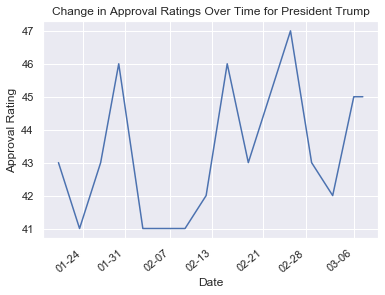

In [14]:
#  Line plot visualizing the change in approval ratings for president Trump over time

ratings = sns.lineplot(x='Date', y='Approval Rating', markers=['o'], dashes=False, data=approval_ratings_df)
ratings.set_xlabel("Date")
ratings.set_ylabel("Approval Rating")
ratings.set_title("Change in Approval Ratings Over Time for President Trump")
dates = approval_ratings_df['Date'].dt.strftime("%m-%d")
ratings.set_xticklabels(labels=dates, rotation=40, ha='right')

Our next step will be to define 2 week long time frames which we will use as parameters for comparing the approval ratings of the president and the sentiments of the Tweets made by him.

In [15]:
# Copying df to a new dataframe; will be changing timestamps to dates in new dataframe

mod_df = df.copy()
mod_df["Date Posted"] = mod_df["Date Posted"].dt.date
mod_df

,Tweet Body,Date Posted,Sentiment
0,china has been working very hard to contain th...,2020-01-24,Positive
1,today i was briefed by leading global health...,2020-01-28,Neutral
2,johnson amp johnson to create coronavirus va...,2020-01-28,Neutral
3,just received a briefing on the coronavirus in...,2020-01-30,Positive
4,working closely with china and others on coron...,2020-01-30,Positive
...,...,...,...
324,the trump admin is making sure senior citize...,2020-05-02,Positive
325,intelligence has just reported to me that i wa...,2020-05-03,Negative
326,roche gets fda emergency use approval for co...,2020-05-03,Neutral
327,mexico is sadly experiencing very big coronavi...,2020-05-04,Negative


In [16]:
# Defining Start and End Dates
start_date = mod_df["Date Posted"][0]
end_date =  mod_df["Date Posted"][len(df["Date Posted"])-1]

# Defining Start Date Ranges
startRange = pd.date_range(start = start_date, end = end_date, freq = "14D")

# Defining End Date Ranges
endRange = startRange - timedelta(days = 1)
endRange = endRange[1::]
endRange = endRange.insert(len(startRange)-1,pd.to_datetime(end_date))

# Storing into new DataFrame
dateRanges = list(zip(startRange,endRange))
sortByDate_df = pd.DataFrame(dateRanges,columns = ["Start Date","End Date"])

# Display DataFrame
sortByDate_df

,Start Date,End Date
0,2020-01-24,2020-02-06
1,2020-02-07,2020-02-20
2,2020-02-21,2020-03-05
3,2020-03-06,2020-03-19
4,2020-03-20,2020-04-02
5,2020-04-03,2020-04-16
6,2020-04-17,2020-04-30
7,2020-05-01,2020-05-05


In [17]:
# Convert approval ratings into bi-weekly date bins

date1 = approval_ratings_df.iloc[0,0]
date2 = sortByDate_df.iloc[0,0]

def getAvgRatings(start, end):
    total = 0
    count = 0
    
    for i in range(0,len(approval_ratings_df)):
        curr_date = approval_ratings_df.iloc[i, 0]
        if (curr_date >= start and curr_date <= end):
            total += approval_ratings_df.iloc[i, 1]
            count += 1
    avg = total / count
    return avg

In [18]:
# Get the average approval rating of the president for each 2 week time period

avg_ratings = []
for i in range(0, len(sortByDate_df)):
    start = sortByDate_df.iloc[i,0]
    end = sortByDate_df.iloc[i,1]
    avg_rating = getAvgRatings(start, end)
    avg_ratings.append(avg_rating)
    
print(avg_ratings)

[42.0, 44.5, 41.0, 41.5, 44.5, 46.0, 42.5, 45.0]


Now that we have a set of the average approval rating of the president for each of the defined time frames, we will calculate the number of positive, negative, and neutral Tweets made by the president during the same defined time frames.

In [19]:
# Getting Sentiment Counters for the Date Ranges

def SentimentCounts (start_Date, end_Date):
    """Function: Counting number of occurences per sentiment type (i.e., negative, neutral, positive)"""
    # Initalizing Return Variables
    num_Neg, num_Neut, num_Pos = 0, 0, 0
    
    # Getting Relevant Section from Dataframe
    temp_df = mod_df[(mod_df['Date Posted'] >= start_Date) & (mod_df['Date Posted'] <= end_Date)]
    
    # Counting Number of Sentiments
    for val in temp_df.itertuples():
        if val.Sentiment == "Negative":
            num_Neg += 1
        elif val.Sentiment == "Neutral":
            num_Neut += 1
        else:
            num_Pos += 1
    
    temp = [num_Neg,num_Neut,num_Pos]
    
    if temp.index(max(temp)) == 0:
        overall = "Negative"
    elif temp.index(max(temp)) == 1:
        overall = "Neutral"
    else:
        overall = "Positive"

    return num_Neg, num_Neut, num_Pos, overall

In [20]:
# Adding Sentiment Counts to dataframe

Sentiment_counts = []
for val in sortByDate_df.itertuples():
    temp = SentimentCounts(val._1, val._2)
    Sentiment_counts.append(temp)


sentiments_df = pd.DataFrame(Sentiment_counts,columns = ["Negative Sentiment","Neutral Sentiment","Positive Sentiment","Overall"])

sortByDate_df = pd.concat([sortByDate_df,sentiments_df], axis = 1)
sortByDate_df
    

,Start Date,End Date,Negative Sentiment,Neutral Sentiment,Positive Sentiment,Overall
0,2020-01-24,2020-02-06,0,3,4,Positive
1,2020-02-07,2020-02-20,0,0,1,Positive
2,2020-02-21,2020-03-05,7,5,20,Positive
3,2020-03-06,2020-03-19,11,33,48,Positive
4,2020-03-20,2020-04-02,14,25,40,Positive
5,2020-04-03,2020-04-16,8,13,29,Positive
6,2020-04-17,2020-04-30,11,15,33,Positive
7,2020-05-01,2020-05-05,3,4,2,Neutral


In [21]:
# Given the Year of Focus is 2020
# Will replace Start Date, End Date with Date Range

# Defining Date Range
dateRange = sortByDate_df["Start Date"].dt.strftime("%m/%d") + sortByDate_df["End Date"].dt.strftime("-%m/%d")
date_Range_df = pd.DataFrame(dateRange,columns = ["Date Range"])

# Replacing Columns
sortByDate_df = sortByDate_df.drop(columns = ["Start Date","End Date"])
sortByDate_df.insert(0,"Date Range",dateRange)
sortByDate_df

,Date Range,Negative Sentiment,Neutral Sentiment,Positive Sentiment,Overall
0,01/24-02/06,0,3,4,Positive
1,02/07-02/20,0,0,1,Positive
2,02/21-03/05,7,5,20,Positive
3,03/06-03/19,11,33,48,Positive
4,03/20-04/02,14,25,40,Positive
5,04/03-04/16,8,13,29,Positive
6,04/17-04/30,11,15,33,Positive
7,05/01-05/05,3,4,2,Neutral


In [22]:
# Create a dataframe of the average approval rating of the president for each 2 week time frame

avg_approval_ratings_data = {'Date Range': dateRange, 'Approval Rating': avg_ratings}
approval_ratings_avg_df = pd.DataFrame(data=avg_approval_ratings_data)
approval_ratings_avg_df

,Date Range,Approval Rating
0,01/24-02/06,42.0
1,02/07-02/20,44.5
2,02/21-03/05,41.0
3,03/06-03/19,41.5
4,03/20-04/02,44.5
5,04/03-04/16,46.0
6,04/17-04/30,42.5
7,05/01-05/05,45.0


After grouping the sentiment analysis data into weekly clusters, we visualized the data using a line plot to show the trend of how the President used language in his tweets. We used the line plot function in seaborn to achieve this. As shown in the line trend, there was a dramatic rise in the use of positive words in his tweets in the month of February. This may suggest his efforts in uplifting and encouraging the American population in the beginning stages of the pandemic. However, there was also a significant rise in the use of neutral words in his tweet during the same time period. This follows our hypothesis that the President will have attempted to inform the American people about current situations in a more neutral stance. Since the negative connotations only started peaking during the middle of March, this may include efforts to discourage the use of masks, his condemnation of the media, and his attempts to exert blame for the pandemic. Although these explanations are not visualized with the data, we can logically pin down the timeframes of where the President changes his attitude. 

([<matplotlib.axis.XTick at 0x1a1c9b4110>,
 <a list of 4 Text xticklabel objects>)

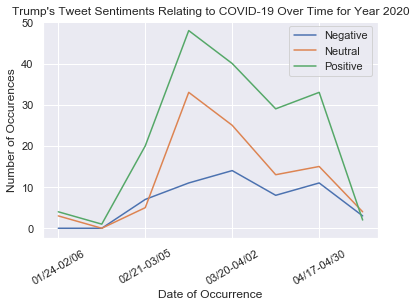

In [23]:
# Line plot showing the changes in the number of positive, negative, and neutral Tweets made by the president over time

fig3 = plt.plot(figsize = [5,5])
sns.lineplot(x = "Date Range", y = "Negative Sentiment", data = sortByDate_df)
sns.lineplot(x="Date Range", y="Neutral Sentiment", data = sortByDate_df)
sns.lineplot(x="Date Range", y="Positive Sentiment", data = sortByDate_df)

plt.legend(labels = ["Negative", "Neutral", "Positive"])
plt.xlabel("Date of Occurrence")
plt.ylabel("Number of Occurences")
plt.title("Trump's Tweet Sentiments Relating to COVID-19 Over Time for Year 2020")
plt.xticks(sortByDate_df["Date Range"][0:15:2],rotation = 30)

Through cross-comparing the 2 previously generated line plots, it can be seen that the consistent low approval rating of 41% at the beginning of February corresponds to the gradual increase in positive sentiments in his Tweets. This can be due to the population losing trust despite his increasing attempts to comfort the American public. The changes in approval ratings fluctuate rapidly, while the sentiment analysis graph does not. This is most likely because approval ratings do not solely depend on the sentiment used in the President’s tweets. This is only one facet of how people determine their ratings for him. It is also pertinent to note that this graph consists of individual approval ratings over time. 

This allows us to analyze the approval ratings trend without using generalizations with a wide time frame. Later on, we will be analyzing this dataset by organizing it biweekly as seen in Figure 2.4. 

The last figure below, overlaps a line plot showing the approval rating during a given week and the spread of tweet sentiments for that week. From the visualization, there doesn’t seem to be a strong relationship relating tweet sentiments to approval ratings. For example, even though Week 05/01-05/05 was predominantly neutral, the approval rating was similar to Week 02/07-02/20 when the tweet sentiment was almost entirely positive. This suggests that there may be other factors that contribute more strongly to the President’s approval rating.


In [24]:
# Now, we want to visualize the proportions of sentiments for each bi-weekly bin as a stacked barplot

stack_df = sortByDate_df.copy()
stack_df

,Date Range,Negative Sentiment,Neutral Sentiment,Positive Sentiment,Overall
0,01/24-02/06,0,3,4,Positive
1,02/07-02/20,0,0,1,Positive
2,02/21-03/05,7,5,20,Positive
3,03/06-03/19,11,33,48,Positive
4,03/20-04/02,14,25,40,Positive
5,04/03-04/16,8,13,29,Positive
6,04/17-04/30,11,15,33,Positive
7,05/01-05/05,3,4,2,Neutral


In [25]:
stack_df = stack_df.drop(columns=['Overall']).set_index('Date Range').rename(columns={
    'Negative Sentiment': 'Negative',
    'Positive Sentiment': 'Positive',
    'Neutral Sentiment': 'Neutral',
    'Date Range': 'Date'
})

stack_df['Negative'] = stack_df['Negative'].astype(float)
stack_df['Positive'] = stack_df['Positive'].astype(float)
stack_df['Neutral'] = stack_df['Neutral'].astype(float)

stack_df['sum'] = stack_df.sum(axis=1)

In [26]:
for i, row in stack_df.iterrows():
    stack_df.at[i, 'Negative'] = stack_df.at[i, 'Negative'] / stack_df.at[i, 'sum']
    stack_df.at[i, 'Positive'] = stack_df.at[i, 'Positive'] / stack_df.at[i, 'sum']
    stack_df.at[i, 'Neutral'] = stack_df.at[i, 'Neutral'] / stack_df.at[i, 'sum']
    
stack_df = stack_df.drop(columns=['sum'])
stack_df


,Negative,Neutral,Positive
Date Range,,,
01/24-02/06,0.000000,0.428571,0.571429
02/07-02/20,0.000000,0.000000,1.000000
02/21-03/05,0.218750,0.156250,0.625000
03/06-03/19,0.119565,0.358696,0.521739
03/20-04/02,0.177215,0.316456,0.506329
04/03-04/16,0.160000,0.260000,0.580000
04/17-04/30,0.186441,0.254237,0.559322
05/01-05/05,0.333333,0.444444,0.222222


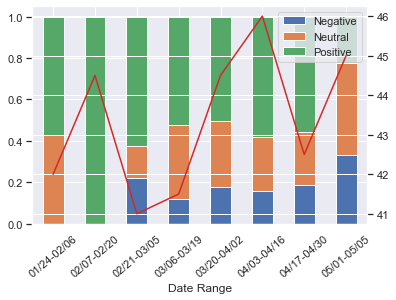

In [27]:
stacked_plot = stack_df.plot(kind='bar', stacked=True, rot=40)

ratings = stacked_plot.twinx()
color = 'tab:red'
ratings.plot(approval_ratings_avg_df['Date Range'], approval_ratings_avg_df['Approval Rating'], color=color)

plt.show()


# Ethics & Privacy

Permissions to use this data for this purpose

- Everything will be done using either an archive of Tweets made by the POTUS [1] or through Tweepy API. 
- Through the Tweepy API, information on responses to a particular set of tweets and user ID's can be used
- Political affiliation of some people can be determined from public account bios
- This means we won’t be able to use any private accounts.
- All public responses will be anonymous in order to guarantee privacy.

Privacy Concern

- We will be abiding by the Safe Harbour Method in order to preserve the anonymity of subjects in our datasets. All information that can be traced back to an individual will be omitted during data clean up and processing. 

Potential Biases, in terms of who it composes and how it was collected? Exclusions of populations?

- Data collection and Analysis is exclusive to Twitter and polls of approval rating.

Other issues that could be problematic?

- Different polling sources could be using different metrics to gauge the approval ratings; we will be consistently referencing only one source, YouGov.

How to handle issues?

- We will only be using approval ratings from nationwide polls in order to determine the overall public sentiment towards the President. We will use a random subset to ensure that it is as representative of the overall population as possible, keeping in mind that these subsets may contain slight biases in them as well.

# Conclusion & Discussion

During our project, we set out to answer the following question: How does the sentiment of certain words used by the US President on Twitter regarding the Coronavirus pandemic affect his approval rating? Previous works from news sites like the NY Times and the Washington Post had already done some minor analysis on Trump’s tweets and their subsequent public response but we wanted to focus more on how it affected his approval rating as well as the ongoing Coronavirus pandemic. For our data analysis, we looked at a subset of tweets from the Trump Twitter Archive and used tools like the Tweepy API and the SentiWordNet API in order to analyze the sentiment of each tweet. We then looked at polls from FiveThirtyEight in order to monitor the changes in Trump’s approval rating over time and see if these were connected to the sentiments of his tweets in any way.

Limitations of Project

Our project explored the relationship between the President’s overall tweet sentiment and his approval ratings. As summarized in the data visualization section, it was found that though the majority of his tweets were positive, his approval ratings were still susceptible to fluctuations. The datasets and metrics used are insufficient in making a cohesive, general statement about the relationship of tweet sentiments to approval ratings. The President was still making other types of tweets during the same time period analyzed, so it would be worth considering the content of the tweets and what types of statements he was making (i.e., use different metrics). In addition, there could have been potential biases lurking in our data analysis that we did not account for in our results. For example, the polls from FiveThirtyEight could have had a larger sample of right vs. left leaning individuals (therefore inflating/deflating the approval rating) or our sentiment analysis tools could have flagged some negative tweets as positive or vice versa. All of these things are potential limitations that could have skewed our results in one way or another. 
 
Impact on Society

The findings from this project emphasize the correlation between the President’s language and his approval ratings. Although we cannot establish a causal relationship between the two variables, we see that one affects the other. This is important because while we predicted that the pandemic changes how the American population views the President, it is vital that we understand how this happens. Through analyzing the dataset of the President’s Tweets, we can identify a trend in his approval ratings during that time period. Not only is sentiment analysis significant in understanding how we view the President, but it also shows his confidence in his team’s response to the pandemic. 


# Team Contributions

William Chung

- Research Question
- Background & Prior Work
- Hypothesis
- Data Analysis
- Conclusion & Discussion
- Ethics & Privacy
- FiveThirtyEight dataset cleaning

Meghan Yiu

- Research Question
- Background & Prior Work
- Hypothesis
- Data Analysis (Visualizations)
- Conclusion & Discussion
- Report formatting

Kieu Huynh

- Research Question
- Background & Prior Work
- Hypothesis
- Ethics
- Project Limitations
- Data Cleaning / Reformatting
- Data Viz

Sahil Umrotkar

- Research Question
- Background & Prior Work
- Hypothesis
- Data Cleaning
- Sentiment Analysis of Trump Tweets
- Data Viz
- EDA